In [26]:
#Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols


# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [27]:
# Step 1: Data Loading and Preprocessing

# Load the dataset
data = pd.read_csv('/Users/Shriya/Bootcamp/Project-1/healthy_lifestyle_city_2021.csv')

# Print the first few rows of the dataset to understand its structure
print(data.head())

# Check for missing values
print(data.isnull().sum())

         City  Rank Sunshine hours(City) Cost of a bottle of water(City)  \
0   Amsterdam     1                 1858                           £1.92   
1      Sydney     2                 2636                           £1.48   
2      Vienna     3                 1884                           £1.94   
3   Stockholm     4                 1821                           £1.72   
4  Copenhagen     5                 1630                           £2.19   

  Obesity levels(Country)  Life expectancy(years) (Country)  \
0                  20.40%                              81.2   
1                  29.00%                              82.1   
2                  20.10%                              81.0   
3                  20.60%                              81.8   
4                  19.70%                              79.8   

  Pollution(Index score) (City) Annual avg. hours worked  \
0                         30.93                     1434   
1                         26.86             

In [28]:
# Conversion rates
GBP_to_USD = 1.39  # Example rate, update with current rate
EUR_to_USD = 1.18  # Example rate, update with current rate

# Function to convert costs to USD
def convert_to_usd(cost_str):
    if cost_str.startswith('$'):
        return float(cost_str.replace('$', ''))
    elif cost_str.startswith('£'):
        return float(cost_str.replace('£', '')) * GBP_to_USD
    elif cost_str.startswith('€'):
        return float(cost_str.replace('€', '')) * EUR_to_USD
    else:
        return float(cost_str)  # Assuming already in USD if no symbol


In [29]:
# Apply conversion to the 'Cost of a monthly gym membership(City)' column
data['Cost of a monthly gym membership(City)'] = data['Cost of a monthly gym membership(City)'].apply(convert_to_usd)

# Verify the conversion
print(data[['City', 'Cost of a monthly gym membership(City)']].head())

         City  Cost of a monthly gym membership(City)
0   Amsterdam                                 48.5110
1      Sydney                                 57.9074
2      Vienna                                 35.7786
3   Stockholm                                 51.8609
4  Copenhagen                                 45.2167


In [30]:
# Step 2: Exploratory Data Analysis (EDA)

# Summary statistics
print(data.describe())

            Rank  Life expectancy(years) (Country)  Happiness levels(Country)  \
count  44.000000                          44.00000                  44.000000   
mean   22.500000                          78.17500                   6.435000   
std    12.845233                           5.30437                   0.991202   
min     1.000000                          56.30000                   3.570000   
25%    11.750000                          75.40000                   5.870000   
50%    22.500000                          80.40000                   6.900000   
75%    33.250000                          81.80000                   7.175000   
max    44.000000                          83.20000                   7.800000   

       Outdoor activities(City)  Number of take out places(City)  \
count                 44.000000                        44.000000   
mean                 213.977273                      1443.113636   
std                  127.190297                      1388.803270  

In [31]:

# Check the column names and types
print(data.columns)


Index(['City', 'Rank', 'Sunshine hours(City)',
       'Cost of a bottle of water(City)', 'Obesity levels(Country)',
       'Life expectancy(years) (Country)', 'Pollution(Index score) (City)',
       'Annual avg. hours worked', 'Happiness levels(Country)',
       'Outdoor activities(City)', 'Number of take out places(City)',
       'Cost of a monthly gym membership(City)'],
      dtype='object')


In [32]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   City                                    44 non-null     object 
 1   Rank                                    44 non-null     int64  
 2   Sunshine hours(City)                    44 non-null     object 
 3   Cost of a bottle of water(City)         44 non-null     object 
 4   Obesity levels(Country)                 44 non-null     object 
 5   Life expectancy(years) (Country)        44 non-null     float64
 6   Pollution(Index score) (City)           44 non-null     object 
 7   Annual avg. hours worked                44 non-null     object 
 8   Happiness levels(Country)               44 non-null     float64
 9   Outdoor activities(City)                44 non-null     int64  
 10  Number of take out places(City)         44 non-null     int64  


In [33]:
# Remove currency symbols and convert 'Cost of a monthly gym membership(City)' to numeric
data['Cost of a monthly gym membership(City)'] = data['Cost of a monthly gym membership(City)'].replace(r'[\$,£]', '', regex=True).astype(float)


In [34]:
# Step 3: Create a new column 'Training Preferences' based on 'Outdoor activities(City)' and cost of membership

def classify_training_preferences(row):
    # Extract values
    outdoor_activities = row['Outdoor activities(City)']
    cost = row['Cost of a monthly gym membership(City)']
    
    # Define thresholds for classification based on outdoor activities
    if outdoor_activities > data['Outdoor activities(City)'].median():
        return 'Outdoor/marathon'
    elif outdoor_activities < data['Outdoor activities(City)'].median() / 2:
        return 'Home workouts'
    else:
        return 'Gym workouts'

In [35]:
# Apply the classification function to each row
data['Training Preferences'] = data.apply(classify_training_preferences, axis=1)

# Verify the new column
print(data[['City', 'Outdoor activities(City)', 'Training Preferences', 'Cost of a monthly gym membership(City)']].head())


         City  Outdoor activities(City) Training Preferences  \
0   Amsterdam                       422     Outdoor/marathon   
1      Sydney                       406     Outdoor/marathon   
2      Vienna                       132         Gym workouts   
3   Stockholm                       129         Gym workouts   
4  Copenhagen                       154         Gym workouts   

   Cost of a monthly gym membership(City)  
0                                 48.5110  
1                                 57.9074  
2                                 35.7786  
3                                 51.8609  
4                                 45.2167  


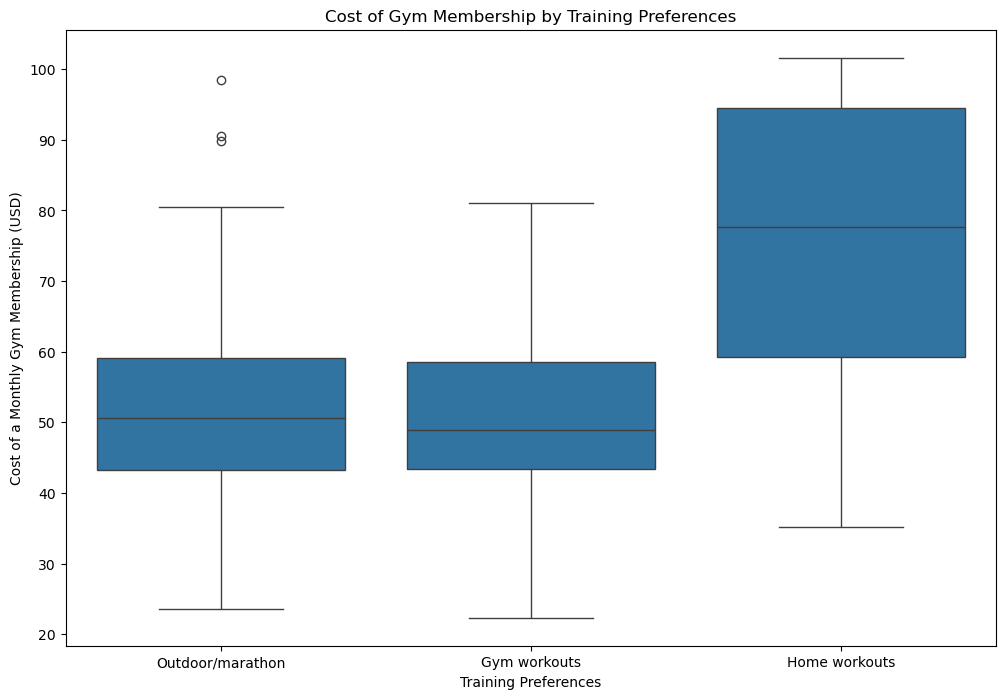

In [36]:
# Step 5: Visualization of gym membership vs training preferences

# Visualize the distribution of gym membership costs by training preferences
plt.figure(figsize=(12, 8))
sns.boxplot(x='Training Preferences', y='Cost of a monthly gym membership(City)', data=data)
plt.title('Cost of Gym Membership by Training Preferences')
plt.xlabel('Training Preferences')
plt.ylabel('Cost of a Monthly Gym Membership (USD)')
plt.show()

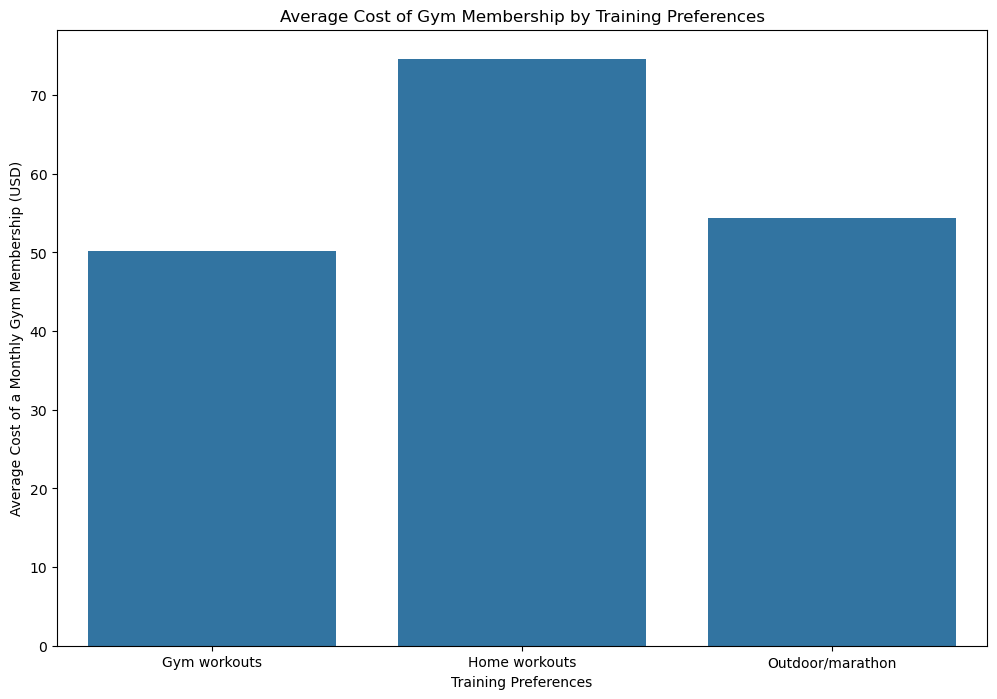

In [37]:
# Visualize the average cost of gym membership for each training preference
plt.figure(figsize=(12, 8))
avg_cost = data.groupby('Training Preferences')['Cost of a monthly gym membership(City)'].mean().reset_index()
sns.barplot(x='Training Preferences', y='Cost of a monthly gym membership(City)', data=avg_cost)
plt.title('Average Cost of Gym Membership by Training Preferences')
plt.xlabel('Training Preferences')
plt.ylabel('Average Cost of a Monthly Gym Membership (USD)')
plt.show()

In [38]:
# Separate data into groups based on training preferences
group_gym_workouts = data[data['Training Preferences'] == 'Gym workouts']['Cost of a monthly gym membership(City)']
group_outdoor_marathon = data[data['Training Preferences'] == 'Outdoor/marathon']['Cost of a monthly gym membership(City)']
group_home_workouts = data[data['Training Preferences'] == 'Home workouts']['Cost of a monthly gym membership(City)']

# Perform One-Way ANOVA
anova_result = stats.f_oneway(group_gym_workouts, group_outdoor_marathon, group_home_workouts)

# Print ANOVA result
print(f'F-statistic: {anova_result.statistic:.4f}')
print(f'p-value: {anova_result.pvalue:.4f}')


F-statistic: 3.8765
p-value: 0.0287
